In [24]:
import pandas as pd
#pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [25]:
pre_rent_data = pd.read_csv("House_Rent_Dataset.csv")

pre_rent_data = pre_rent_data.dropna(subset=['price'])
pre_rent_data = pre_rent_data.dropna(subset=['area'])
#pre_rent_data = pre_rent_data.dropna(subset=['baths'])
#pre_rent_data = pre_rent_data.dropna(subset=['beds'])
#pre_rent_data = pre_rent_data.dropna(subset=['lotSize'])
#pre_rent_data = pre_rent_data.dropna(subset=['sqFt'])

imputer = SimpleImputer(strategy='mean')
pre_rent_data['baths'] = imputer.fit_transform(pre_rent_data[['baths']])
pre_rent_data['beds'] = imputer.fit_transform(pre_rent_data[['beds']])
pre_rent_data['lotSize'] = imputer.fit_transform(pre_rent_data[['lotSize']])
#pre_rent_data['pricePerSqFt'] = imputer.fit_transform(pre_rent_data[['pricePerSqFt']])
pre_rent_data['sqFt'] = imputer.fit_transform(pre_rent_data[['sqFt']])
pre_rent_data['stories'] = imputer.fit_transform(pre_rent_data[['stories']])
pre_rent_data['yearBuilt'] = imputer.fit_transform(pre_rent_data[['yearBuilt']])

rent_data = pre_rent_data
print(rent_data.isna().sum())

baths        0
beds         0
city         0
area         0
lotSize      0
price        0
sqFt         0
stories      0
yearBuilt    0
zipcode      0
dtype: int64


In [26]:
rent_data.shape
rent_data.columns

Index(['baths', 'beds', 'city', 'area', 'lotSize', 'price', 'sqFt', 'stories',
       'yearBuilt', 'zipcode'],
      dtype='object')

In [27]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25328 entries, 0 to 30786
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   baths      25328 non-null  float64
 1   beds       25328 non-null  float64
 2   city       25328 non-null  object 
 3   area       25328 non-null  object 
 4   lotSize    25328 non-null  float64
 5   price      25328 non-null  float64
 6   sqFt       25328 non-null  float64
 7   stories    25328 non-null  float64
 8   yearBuilt  25328 non-null  float64
 9   zipcode    25328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.1+ MB


In [28]:
#rent_data.describe()
#rent_data.isnull().sum()
#rent_data.duplicated().sum()
rent_data.drop_duplicates()

# List of cities to delete
cities_to_delete = ['Memphis', 'Bay Saint Louis', 'Pearl', 'Coila', 'Carrollton', 'Saucier', 'Long Beach', 'Braxton', 'Horn Lake', 'Hernando', 'Vancleave', 'Courtland', 'Ocean Springs', 'Clinton', 'Pocahontas', 'Jackson-ms', 'Diberville', 'Walls', 'Nesbit', "D'iberville", 'Olive Branch', 'Raymond', 'Gulfport', 'Byram']  # Replace with actual city names

# Filtering out rows where the 'city column matches any in cities_to_delete
rent_data = rent_data[~rent_data['city'].isin(cities_to_delete)]

unique_cities = rent_data['city'].unique()
print(unique_cities)

['Biloxi' 'Southaven' 'Hattiesburg' 'Jackson' 'Greenwood' 'Oxford']


In [29]:
print("Mean House Price: ", round(rent_data["price"].mean()))
print("Median House Price: ", round(rent_data["price"].median()))

print("Highest House Price: ", round(rent_data["price"].max()))
print("Lowest House Price: ", round(rent_data["price"].min()))

Mean House Price:  224235
Median House Price:  212500
Highest House Price:  3550000
Lowest House Price:  379


In [30]:
rent_data["price"].sort_values()[:5]

25861     379.0
26927     500.0
30270     500.0
22919    1000.0
27240    1500.0
Name: price, dtype: float64

DATA VISUALIZATION


******************************************************

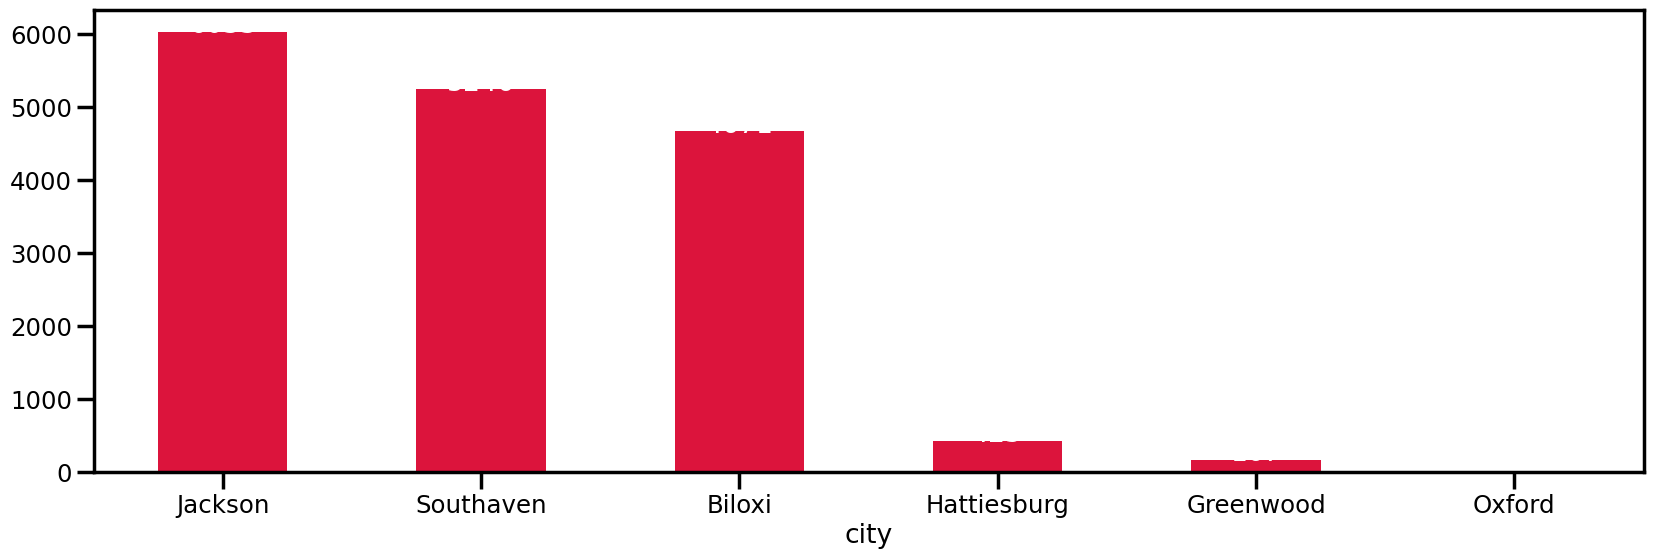

In [32]:
#displaying plot for number of House in Each City which is Available for Sale

sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))

ax = rent_data["city"].value_counts().plot(kind = 'bar', 
                                           color = 'crimson', 
                                           rot = 0)

for itr in ax.patches:
    ax.annotate(int(itr.get_height()), (itr.get_x()+ 0.25, itr.get_height() -100), 
                ha = 'center', 
                va = 'bottom', 
                color = 'white')

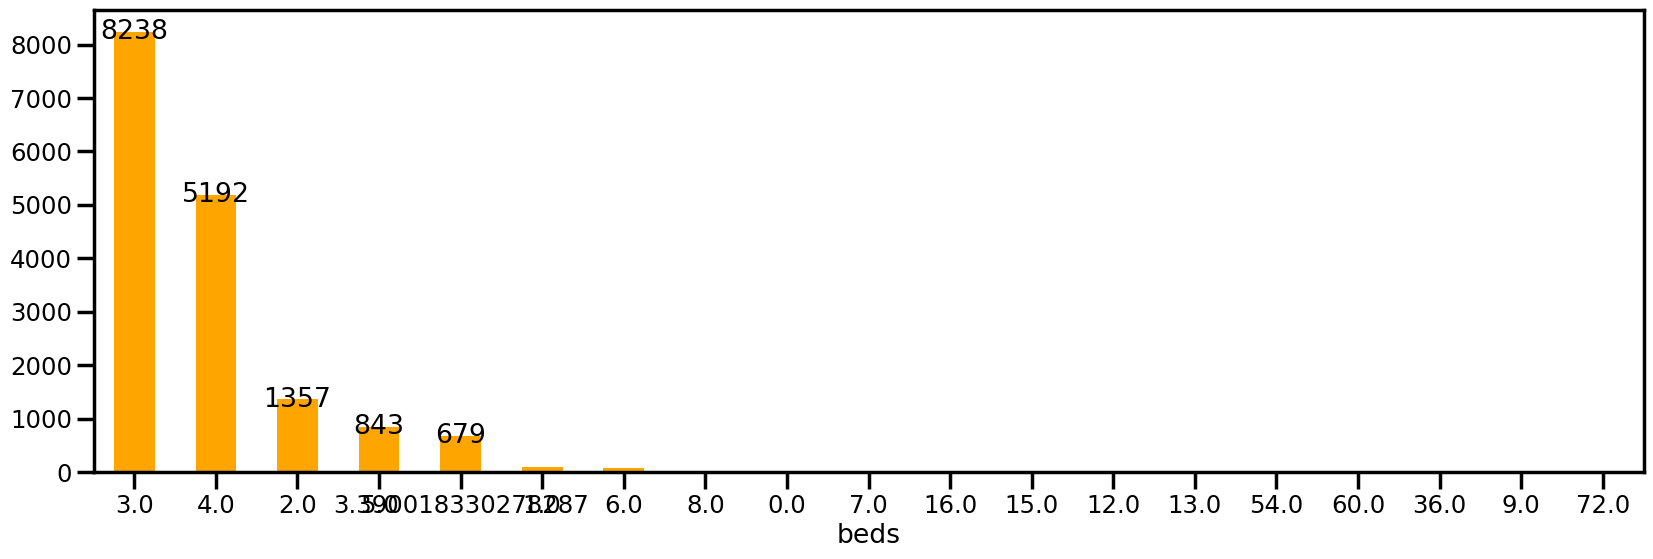

In [33]:
#Bar Plot on Different Types of Bedroom

sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))

ax = rent_data["beds"].value_counts().plot(kind = 'bar', 
                                           color = 'orange', 
                                           rot = 0)

for itr in ax.patches:
    ax.annotate(int(itr.get_height()), (itr.get_x()+ 0.25, itr.get_height() -250), 
                ha = 'center', 
                va = 'bottom', 
                color = 'black')

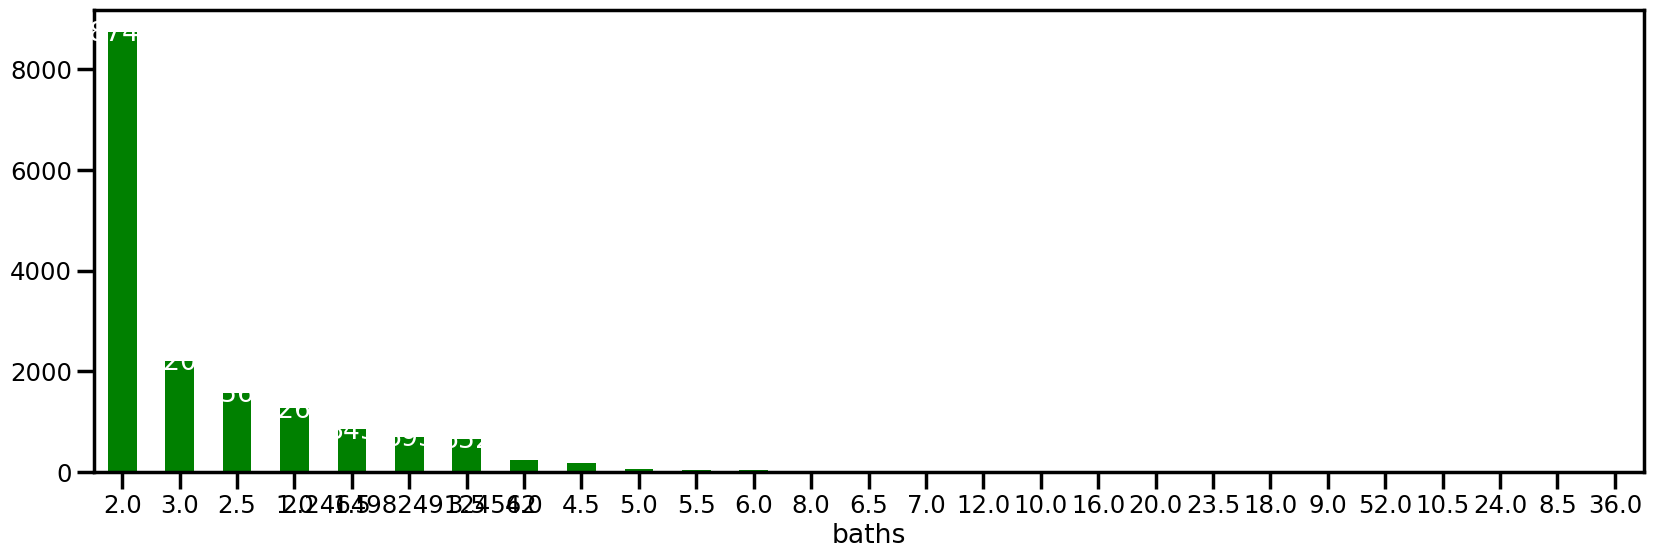

In [34]:
#Bar Plot on Different Types of Baths 

sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))

ax = rent_data["baths"].value_counts().plot(kind = 'bar', 
                                           color = 'Green', 
                                           rot = 0)

for itr in ax.patches:
    ax.annotate(int(itr.get_height()), (itr.get_x()+ 0.25, itr.get_height() -300), 
                ha = 'center', 
                va = 'bottom', 
                color = 'white')

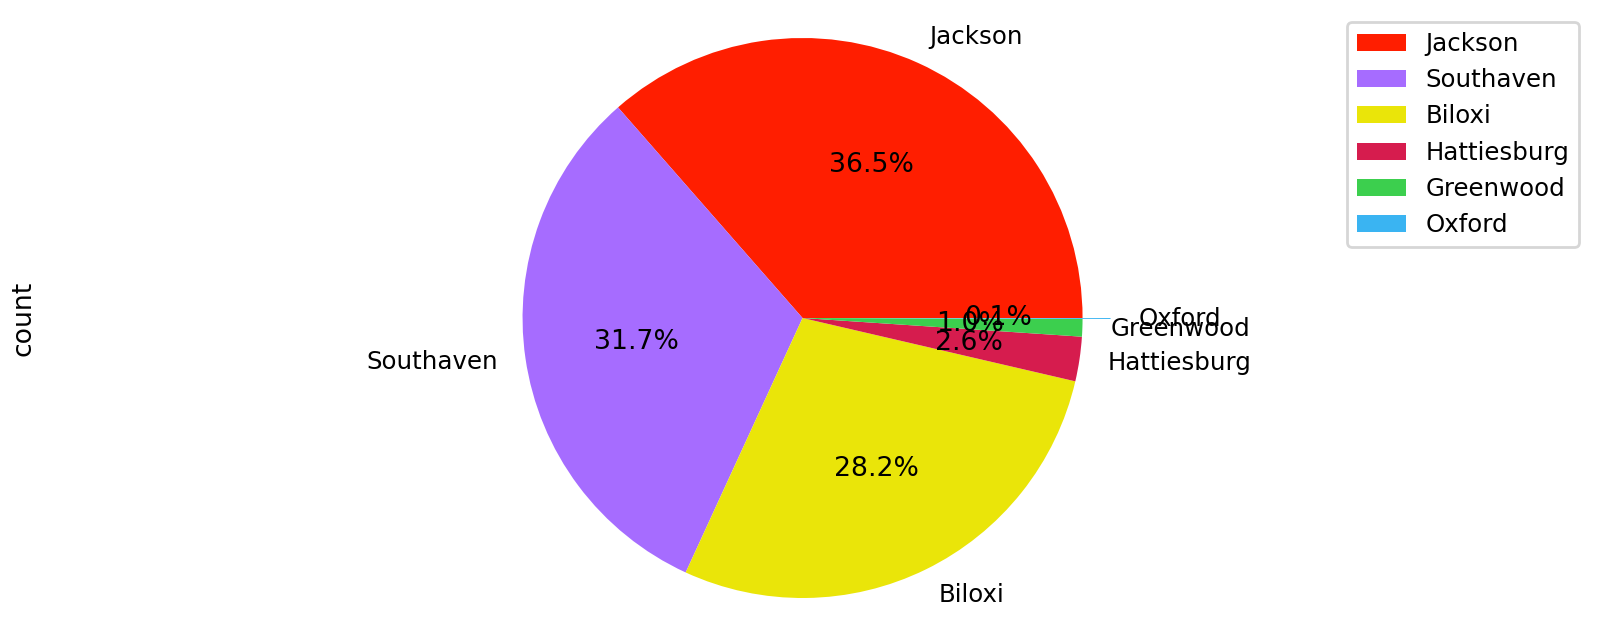

In [35]:
#Pie Plot on Cities to check the distribution

plt.figure(figsize = (20, 8))
counts = rent_data["city"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie', 
           colors = colors,
           explode = explode,
           autopct = '%1.1f%%')

plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [36]:
print(rent_data.isnull().sum())

baths        0
beds         0
city         0
area         0
lotSize      0
price        0
sqFt         0
stories      0
yearBuilt    0
zipcode      0
dtype: int64


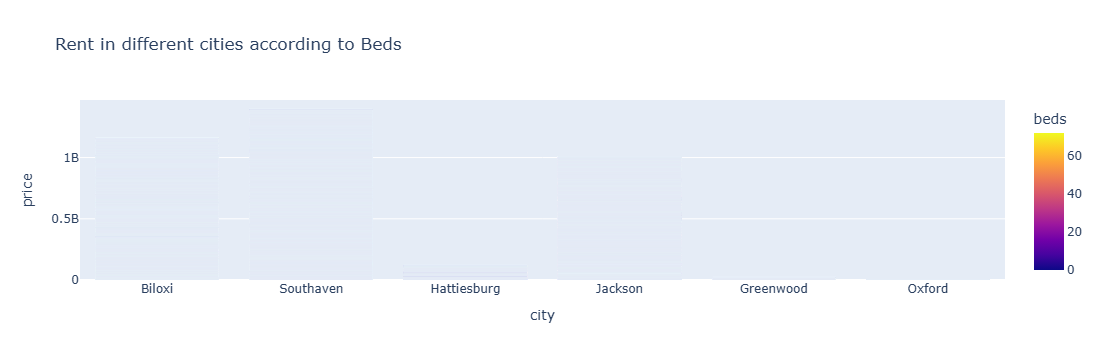

In [37]:
figure = px.bar(rent_data, x=rent_data["city"], 
                y=rent_data["price"], 
                color = rent_data["beds"], 
                title = "Rent in different cities according to Beds")
figure.show()

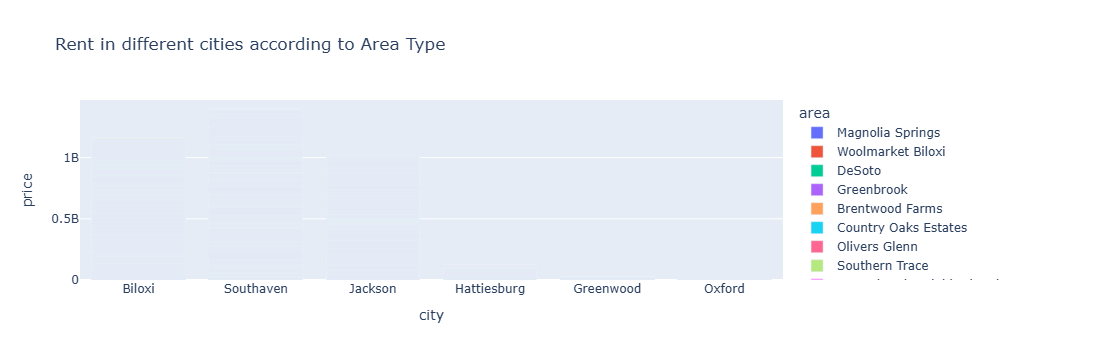

In [38]:
figure = px.bar(rent_data, x=rent_data["city"], 
                y=rent_data["price"], 
                color = rent_data["area"], 
                title = "Rent in different cities according to Area Type")
figure.show()

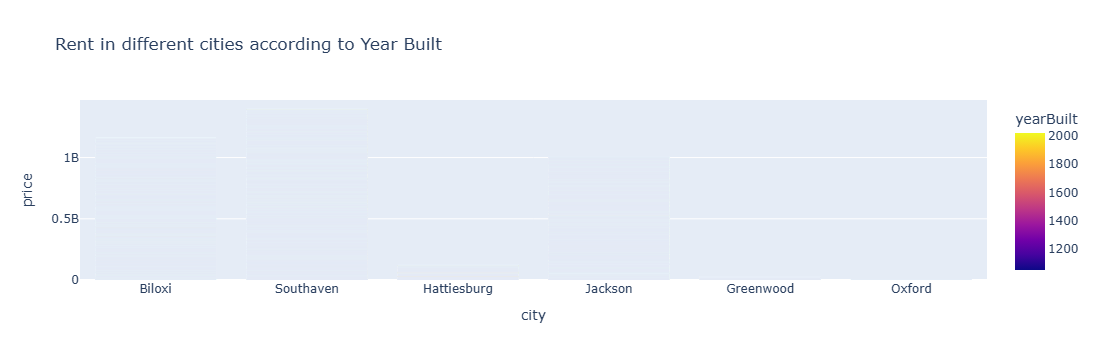

In [39]:
figure = px.bar(rent_data, x=rent_data["city"], 
                y=rent_data["price"], 
                color = rent_data["yearBuilt"], 
                title = "Rent in different cities according to Year Built")
figure.show()

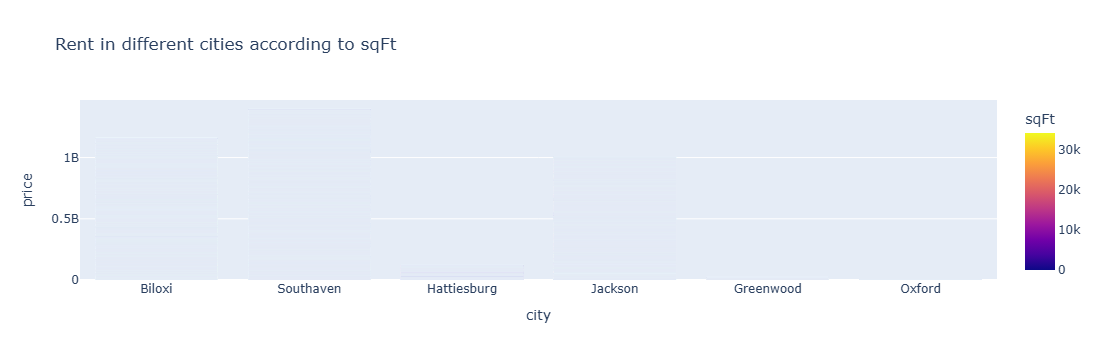

In [40]:
figure = px.bar(rent_data, x=rent_data["city"],
                y=rent_data["price"],
                color = rent_data["sqFt"],
                title = "Rent in different cities according to sqFt")
figure.show()

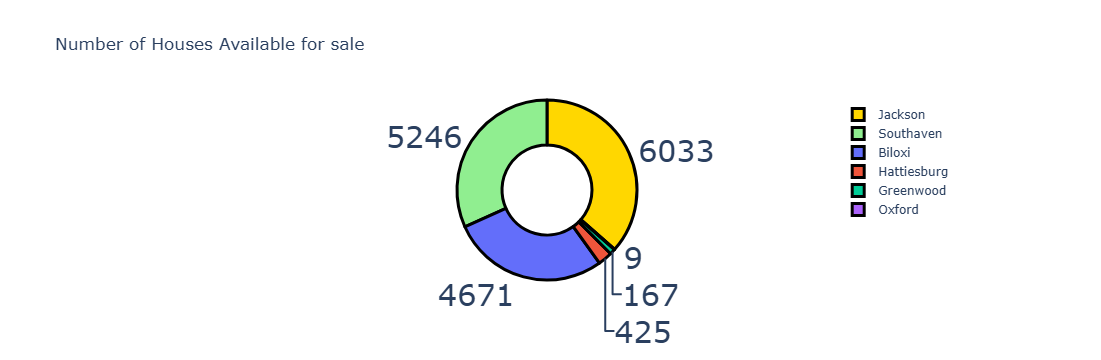

In [41]:
cities = rent_data["city"].value_counts()
label = cities.index
counts = cities.values
color = ['gold', 'lightgreen']

fig = go.Figure(data = [go.Pie(labels = label, values = counts, hole = 0.5)])
fig.update_layout(title_text='Number of Houses Available for sale')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=color, line=dict(color='black', width=3)))
fig.show()

In [42]:
#Converting categorical features into numerical features

#areas = rent_data['area'].unique()

#zipcodes = rent_data['zipcode'].unique()

#label_encoder = LabelEncoder()


#rent_data['area_encoded'] = label_encoder.fit_transform(rent_data['area'])

#rent_data['zipcode_encoded'] = label_encoder.fit_transform(rent_data['zipcode'])

#print(rent_data[['area', 'area_encoded']].head())


# Create separate LabelEncoder instances
area_encoder = LabelEncoder()
zipcode_encoder = LabelEncoder()

# Fit and transform the 'area' column
rent_data['area_encoded'] = area_encoder.fit_transform(rent_data['area'])

# Fit and transform the 'zipcode' column
rent_data['zipcode_encoded'] = zipcode_encoder.fit_transform(rent_data['zipcode'])

# Display the first few rows to see the encoded values
print(rent_data[['area', 'area_encoded', 'zipcode', 'zipcode_encoded']].head())

                   area  area_encoded zipcode  zipcode_encoded
876    Magnolia Springs           586   39532               35
2316  Woolmarket Biloxi          1135   39532               35
7692             DeSoto           281   38671                3
7693         Greenbrook           416   38671                3
7694    Brentwood Farms           125   38671                3


C:\Users\Ayomi\AppData\Local\Temp\ipykernel_20396\698008294.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ayomi\AppData\Local\Temp\ipykernel_20396\698008294.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
#Converting categorical features into numerical features

rent_data["city"] = rent_data["city"].map({"Greenwood": 1,
                                                    "Jackson": 2,
                                                    "Biloxi": 3,
                                                     "Southaven": 4,
                                                      "Hattiesburg": 5, 
                                                      "Oxford": 6})

C:\Users\Ayomi\AppData\Local\Temp\ipykernel_20396\287770838.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
#Splitting data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


x = np.array(rent_data[["baths", "beds", "city", "area_encoded", "zipcode_encoded", "lotSize", "sqFt", "stories"]])

y = np.array(rent_data[["price"]])

# Initialize scalers
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit scalers on data and transform
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)



xtrain, xtest, ytrain, ytest =  train_test_split(x_scaled, 
                                                 y_scaled, 
                                                 test_size=0.10, 
                                                 random_state=42)

In [45]:
!pip install tensorflow

from keras.models import Sequential 
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (xtrain.shape[1], 1)))

model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Defaulting to user installation because normal site-packages is not writeable


C:\Users\Ayomi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 8, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

model.save('house_price_prediction_model.keras')

joblib.dump(scaler_x, 'feature_scaler.pkl')  # Save the input feature scaler
joblib.dump(scaler_y, 'target_scaler.pkl')   # Save the target price scaler

# Save the encoders for future use
joblib.dump(area_encoder, 'area_encoder.pkl')
joblib.dump(zipcode_encoder, 'zipcode_encoder.pkl')

Epoch 1/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - loss: 0.0018
Epoch 2/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.0012
Epoch 3/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - loss: 9.6662e-04
Epoch 4/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - loss: 9.6408e-04
Epoch 5/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - loss: 8.2620e-04
Epoch 6/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - loss: 7.9741e-04
Epoch 7/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 69s 5ms/step - loss: 7.5228e-04
Epoch 8/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - loss: 7.4926e-04
Epoch 9/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - loss: 6.8342e-04
Epoch 10/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - loss: 7.9966e-04
Epoch 11/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - loss: 7.7841e-04
Epoch 12/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - loss: 8.4472e-04
Epoch 13/30
14895/14895 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 6.9764e-04
Epoch 14/30
1489

['zipcode_encoder.pkl']

In [47]:
# Measure the accuracy of the prediction
predictions = model.predict(xtest)

# Calculate and print MAE
mae = mean_absolute_error(ytest, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate and print MSE
mse = mean_squared_error(ytest, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate and print RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate and print R-squared
r2 = r2_score(ytest, predictions)
print(f"R-squared (R²): {r2}")


#area_encoder = joblib.load('area_encoder.pkl')
#zipcode_encoder = joblib.load('zipcode_encoder.pkl')

#print("Enter House Details to Predict Rent")

#a = int(input("Number of Baths: "))
#b = int(input("Number of Beds: "))
#city_code = int(input("City: 'Greenwood': 1, 'Jackson': 2, 'Biloxi': 3, 'Southaven': 4, 'Hattiesburg': 5, 'Oxford': 6): "))
#area_input = input("Area (name): ")  # Take area name as input
#lot_size = int(input("lotSize: "))
#sq_ft = int(input("sqFt: "))
#stories = int(input("stories: "))
#year_built = int(input("yearBuilt: "))
#zipcode_input = input("zipcode (as string): ")  # Take zipcode as input

#area_encoded = area_encoder.transform([area_input])[0]  # Use the encoder to transform input
#zipcode_encoded = zipcode_encoder.transform([zipcode_input])[0]  # Use the encoder to transform input

#features = np.array([[a, b, city_code, area_encoded, lot_size, sq_ft, stories]])
#print("Predicted House Price = ", model.predict(features))

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Mean Absolute Error (MAE): 0.018138130778652613
Mean Squared Error (MSE): 0.0006849574444068005
Root Mean Squared Error (RMSE): 0.0261716916611594
R-squared (R²): 0.5754012755117213
